# Machine Learning with EEG time series
Following this [tutorial](https://youtu.be/B8kILqgbxoc)

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt


In [3]:
EVENT_ID = {
    'rest' : None,
    'left_fist' : None,
    'right_fist': None,
}

FREQ_BANDS = {
    'delta': [0.5, 4.5],
    'theta': [4.5, 8.5],
    'alpha': [8.5, 11.5],
    'sigma': [11.5, 15.5],
    'beta': [15.5, 30]
}

In [12]:
raw_edf = mne.io.read_raw_edf(
    'files/S001/S001R03.edf',
    infer_types=True,
    preload=True,
    verbose='error'
    )

annotation_edf = mne.read_annotations('files/S001/S001R03.edf')

In [13]:
annotation_edf

<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>

In [14]:
raw_edf.info['ch_names']

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


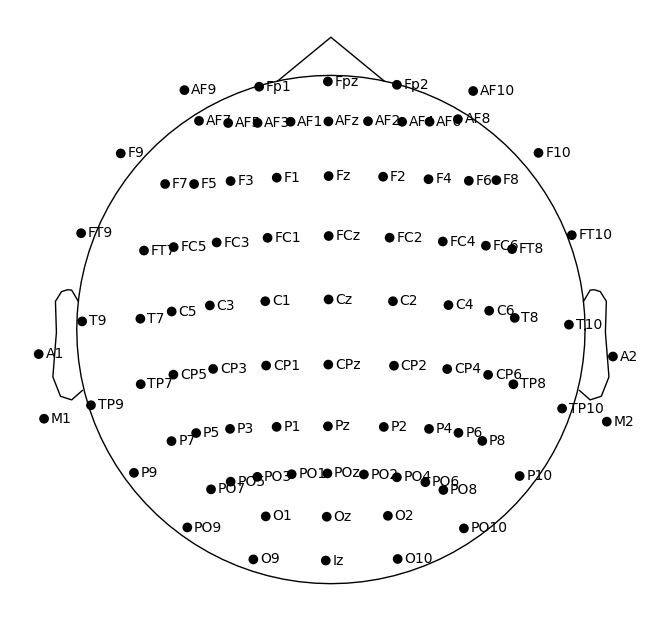

In [51]:
import mne

# Load a standard montage (for example, "standard_1020")
montage = mne.channels.make_standard_montage('standard_1020')

montage.plot(sphere=(0.0, 0.01, 0.0, 0.095));

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


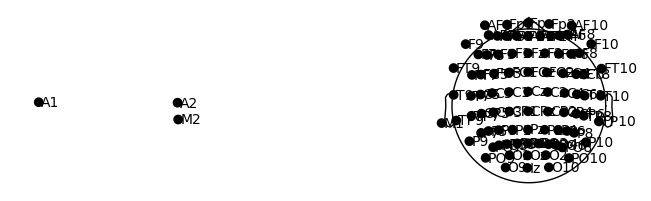

In [32]:
import numpy as np

# Load a standard montage (for example, "standard_1020")
montage = mne.channels.make_standard_montage('standard_1020')

# Define a translation vector (e.g., shift along the x, y, z axis)
translation_vector = np.array([0.5, -0, 0.])  # in meters

# Apply translation to each electrode position
for ch_name in montage.ch_names:
    montage.dig[montage.ch_names.index(ch_name)]['r'] += translation_vector

montage.plot();

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


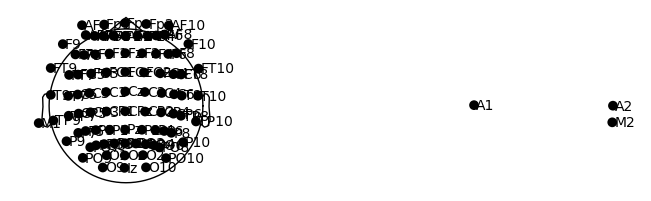

In [40]:
import mne
import numpy as np

# Load the montage (e.g., standard_1020)
montage = mne.channels.make_standard_montage('standard_1020')

# Define the amount to shift down in the y-axis
y_shift = -0.5  # in meters (negative moves the sensors downward)

# Apply the shift to each electrode in the montage
for ch_name in montage.ch_names:
    montage.dig[montage.ch_names.index(ch_name)]['r'][0] += y_shift

# Plot the adjusted montage in 2D
montage.plot(kind='topomap');